    1. MAKE KAGGLE DIRECTORY

In [3]:
#make kaggle directory
%mkdir -p ~/.kaggle
%cp kaggle.json ~/.kaggle/
%chmod 600 ~/.kaggle/kaggle.json


The syntax of the command is incorrect.UsageError: Line magic function `%cp` not found.



    2. DOWNLOAD DATASET

In [2]:
#downlaod dataset
!kaggle datasets download -d patrickfleith/nasa-battery-dataset


'kaggle' is not recognized as an internal or external command,
operable program or batch file.


    3. UNZIP IT

In [5]:
!unzip nasa-battery-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: cleaned_dataset/data/02576.csv  
  inflating: cleaned_dataset/data/02577.csv  
  inflating: cleaned_dataset/data/02578.csv  
  inflating: cleaned_dataset/data/02579.csv  
  inflating: cleaned_dataset/data/02580.csv  
  inflating: cleaned_dataset/data/02581.csv  
  inflating: cleaned_dataset/data/02582.csv  
  inflating: cleaned_dataset/data/02583.csv  
  inflating: cleaned_dataset/data/02584.csv  
  inflating: cleaned_dataset/data/02585.csv  
  inflating: cleaned_dataset/data/02586.csv  
  inflating: cleaned_dataset/data/02587.csv  
  inflating: cleaned_dataset/data/02588.csv  
  inflating: cleaned_dataset/data/02589.csv  
  inflating: cleaned_dataset/data/02590.csv  
  inflating: cleaned_dataset/data/02591.csv  
  inflating: cleaned_dataset/data/02592.csv  
  inflating: cleaned_dataset/data/02593.csv  
  inflating: cleaned_dataset/data/02594.csv  
  inflating: cleaned_dataset/data/02595.csv  
  inflating: cleaned_dataset/

    4. PREVIEW DATASET

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cleaned_dataset/metadata.csv')
df.head()
df = df[df['type']=='discharge']
x = df.drop(columns=['start_time','ambient_temperature','Capacity','Re','Rct'])
x['cycle_count'] = x.groupby('battery_id').cumcount()+1
x.drop(columns=['test_id','uid'],inplace=True)
x.drop(columns=['test_id','uid'],inplace=True)

#make battery-wise
import os
import pandas as pd

# Paths
metadata_path = "/content/cleaned_dataset/metadata.csv"
data_folder = "/content/cleaned_dataset/data"   # folder where all cycle csvs are stored
output_folder = "/content/datasets"
os.makedirs(output_folder, exist_ok=True)

# Load metadata
metadata = pd.read_csv(metadata_path)

# Process per battery
for battery_id, group in x.groupby("battery_id"):
    merged_df = []

    # Sort by cycle count to keep temporal order
    group = group.sort_values("cycle_count")

    for _, row in group.iterrows():
        file_path = os.path.join(data_folder, row["filename"])

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df["battery_id"] = battery_id
            df["cycle_count"] = row["cycle_count"]  # keep cycle number
            merged_df.append(df)
        else:
            print(f"Warning: {file_path} not found, skipping.")

    if merged_df:
        final_df = pd.concat(merged_df, ignore_index=True)
        output_file = os.path.join(output_folder, f"battery_{battery_id}.csv")
        final_df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(final_df)} rows.")

#train-val-test split on whole
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Path where all battery CSVs are stored
data_dir = "/content/datasets"   # change this to your folder path

# List all battery files
all_batteries = [f for f in os.listdir(data_dir) if f.endswith(".csv")]

# Remove extensions for clean IDs
all_battery_ids = [os.path.splitext(f)[0] for f in all_batteries]

# Split into train (70%), val (15%), test (15%)
train_ids, temp_ids = train_test_split(all_battery_ids, test_size=0.30, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.50, random_state=42)

print(f"Train batteries: {len(train_ids)}")
print(f"Val batteries: {len(val_ids)}")
print(f"Test batteries: {len(test_ids)}")

# Function to combine cycles of selected batteries into one dataset
def combine_batteries(battery_ids, save_path):
    dfs = []
    for b in battery_ids:
        file_path = os.path.join(data_dir, f"{b}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df["battery_id"] = b  # keep battery label
            dfs.append(df)
    final_df = pd.concat(dfs, ignore_index=True)
    final_df.to_csv(save_path, index=False)

    # Check total
    return final_df

# Create final datasets
train_df = combine_batteries(train_ids, "train_dataset.csv")
val_df   = combine_batteries(val_ids, "val_dataset.csv")
test_df  = combine_batteries(test_ids, "test_dataset.csv")

print("Datasets created:")
print(f"Train shape: {train_df.shape}")
print(f"Val shape:   {val_df.shape}")
print(f"Test shape:  {test_df.shape}")


In [6]:
import pandas as pd
df = pd.read_csv('/content/cleaned_dataset/metadata.csv')
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


    5. FEATURE FILTERATION

In [7]:
df = df[df['type']=='discharge']

In [8]:
x = df.drop(columns=['start_time','ambient_temperature','Capacity','Re','Rct'])
x

,type,battery_id,test_id,uid,filename
0,discharge,B0047,0,1,00001.csv
4,discharge,B0047,4,5,00005.csv
6,discharge,B0047,6,7,00007.csv
8,discharge,B0047,8,9,00009.csv
10,discharge,B0047,10,11,00011.csv
...,...,...,...,...,...
7553,discharge,B0055,240,7554,07554.csv
7555,discharge,B0055,242,7556,07556.csv
7557,discharge,B0055,244,7558,07558.csv
7561,discharge,B0055,248,7562,07562.csv


In [9]:
x['cycle_count'] = x.groupby('battery_id').cumcount()+1

In [10]:
x.drop(columns=['test_id','uid'],inplace=True)
x

,type,battery_id,filename,cycle_count
0,discharge,B0047,00001.csv,1
4,discharge,B0047,00005.csv,2
6,discharge,B0047,00007.csv,3
8,discharge,B0047,00009.csv,4
10,discharge,B0047,00011.csv,5
...,...,...,...,...
7553,discharge,B0055,07554.csv,98
7555,discharge,B0055,07556.csv,99
7557,discharge,B0055,07558.csv,100
7561,discharge,B0055,07562.csv,101


    6. MAKE DATASET BATTERY-WISE

In [11]:
import os
import pandas as pd

# Paths
metadata_path = "/content/cleaned_dataset/metadata.csv"
data_folder = "/content/cleaned_dataset/data"   # folder where all cycle csvs are stored
output_folder = "/content/datasets"
os.makedirs(output_folder, exist_ok=True)

# Load metadata
metadata = pd.read_csv(metadata_path)

# Process per battery
for battery_id, group in x.groupby("battery_id"):
    merged_df = []

    # Sort by cycle count to keep temporal order
    group = group.sort_values("cycle_count")

    for _, row in group.iterrows():
        file_path = os.path.join(data_folder, row["filename"])

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df["battery_id"] = battery_id
            df["cycle_count"] = row["cycle_count"]  # keep cycle number
            merged_df.append(df)
        else:
            print(f"Warning: {file_path} not found, skipping.")

    if merged_df:
        final_df = pd.concat(merged_df, ignore_index=True)
        output_file = os.path.join(output_folder, f"battery_{battery_id}.csv")
        final_df.to_csv(output_file, index=False)
        print(f"Saved {output_file} with {len(final_df)} rows.")


Saved /content/datasets/battery_B0005.csv with 50285 rows.
Saved /content/datasets/battery_B0006.csv with 50285 rows.
Saved /content/datasets/battery_B0007.csv with 50285 rows.
Saved /content/datasets/battery_B0018.csv with 34866 rows.
Saved /content/datasets/battery_B0025.csv with 16338 rows.
Saved /content/datasets/battery_B0026.csv with 16338 rows.
Saved /content/datasets/battery_B0027.csv with 16338 rows.
Saved /content/datasets/battery_B0028.csv with 16338 rows.
Saved /content/datasets/battery_B0029.csv with 6351 rows.
Saved /content/datasets/battery_B0030.csv with 6351 rows.
Saved /content/datasets/battery_B0031.csv with 6351 rows.
Saved /content/datasets/battery_B0032.csv with 6351 rows.
Saved /content/datasets/battery_B0033.csv with 47065 rows.
Saved /content/datasets/battery_B0034.csv with 47065 rows.
Saved /content/datasets/battery_B0036.csv with 47065 rows.
Saved /content/datasets/battery_B0038.csv with 20201 rows.
Saved /content/datasets/battery_B0039.csv with 20201 rows.
S

      8. MAKE TRAIN-TEST-VALIDATION SPLIT ON WHOLE BATTERY-DATASET

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Path where all battery CSVs are stored
data_dir = "/content/datasets"   # change this to your folder path

# List all battery files
all_batteries = [f for f in os.listdir(data_dir) if f.endswith(".csv")]

# Remove extensions for clean IDs
all_battery_ids = [os.path.splitext(f)[0] for f in all_batteries]

# Split into train (70%), val (15%), test (15%)
train_ids, temp_ids = train_test_split(all_battery_ids, test_size=0.30, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.50, random_state=42)

print(f"Train batteries: {len(train_ids)}")
print(f"Val batteries: {len(val_ids)}")
print(f"Test batteries: {len(test_ids)}")

# Function to combine cycles of selected batteries into one dataset
def combine_batteries(battery_ids, save_path):
    dfs = []
    for b in battery_ids:
        file_path = os.path.join(data_dir, f"{b}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df["battery_id"] = b  # keep battery label
            dfs.append(df)
    final_df = pd.concat(dfs, ignore_index=True)
    final_df.to_csv(save_path, index=False)

    # Check total
    return final_df

# Create final datasets
train_df = combine_batteries(train_ids, "train_dataset.csv")
val_df   = combine_batteries(val_ids, "val_dataset.csv")
test_df  = combine_batteries(test_ids, "test_dataset.csv")

print("Datasets created:")
print(f"Train shape: {train_df.shape}")
print(f"Val shape:   {val_df.shape}")
print(f"Test shape:  {test_df.shape}")


Train batteries: 23
Val batteries: 5
Test batteries: 6
Datasets created:
Train shape: (532621, 8)
Val shape:   (129615, 8)
Test shape:  (107834, 8)


In [13]:
# Which batteries were missed? (CHECK)
print("Total CSV files found:", len(all_battery_ids))
used_ids = set(train_ids + val_ids + test_ids)
missed_ids = set(all_battery_ids) - used_ids
print("Missed batteries:", missed_ids)


Total CSV files found: 34
Missed batteries: set()


    #SANITY CHECK

In [14]:
import pandas as pd
train = pd.read_csv("/content/train_dataset.csv")
val   = pd.read_csv("/content/val_dataset.csv")
test  = pd.read_csv("/content/test_dataset.csv")

wanted = ["Voltage_measured","Current_measured","Temperature_measured",
          "Time","battery_id","cycle_count"]
for df,name in [(train,"train"),(val,"val"),(test,"test")]:
    print(name, df.shape, df[wanted].isna().sum().to_dict())
    print("batteries:", df["battery_id"].nunique(),
          "min/max cycle:", df["cycle_count"].min(), df["cycle_count"].max())


train (532621, 8) {'Voltage_measured': 0, 'Current_measured': 0, 'Temperature_measured': 0, 'Time': 0, 'battery_id': 0, 'cycle_count': 0}
batteries: 23 min/max cycle: 1 197
val (129615, 8) {'Voltage_measured': 0, 'Current_measured': 0, 'Temperature_measured': 0, 'Time': 0, 'battery_id': 0, 'cycle_count': 0}
batteries: 5 min/max cycle: 1 168
test (107834, 8) {'Voltage_measured': 0, 'Current_measured': 0, 'Temperature_measured': 0, 'Time': 0, 'battery_id': 0, 'cycle_count': 0}
batteries: 6 min/max cycle: 1 197


# TEST RUN-1

Loading CSVs and building per-cycle sequences...
Shapes (cycles): (1857, 300, 3) (495, 300, 3) (442, 300, 3)
Normal train cycles: 585 / 1857
Saved scaler to artifacts/scaler.pkl
DataLoaders ready. Train batches: 10
Starting training on normal cycles...
Epoch 1: Train 0.9439 | Val 0.8112
  -> saved best_model.pth (epoch 1)
Epoch 2: Train 0.7320 | Val 0.5300
  -> saved best_model.pth (epoch 2)
Epoch 3: Train 0.5941 | Val 0.5038
  -> saved best_model.pth (epoch 3)
Epoch 4: Train 0.5314 | Val 0.5623
Epoch 5: Train 0.5030 | Val 0.4812
  -> saved best_model.pth (epoch 5)
Epoch 6: Train 0.4852 | Val 0.4804
  -> saved best_model.pth (epoch 6)
Epoch 7: Train 0.4723 | Val 0.4385
  -> saved best_model.pth (epoch 7)
Epoch 8: Train 0.4508 | Val 0.4614
Epoch 9: Train 0.4530 | Val 0.3996
  -> saved best_model.pth (epoch 9)
Epoch 10: Train 0.4567 | Val 0.4447
Epoch 11: Train 0.4516 | Val 0.3786
  -> saved best_model.pth (epoch 11)
Epoch 12: Train 0.4331 | Val 0.4109
Epoch 13: Train 0.4332 | Val 0.4215

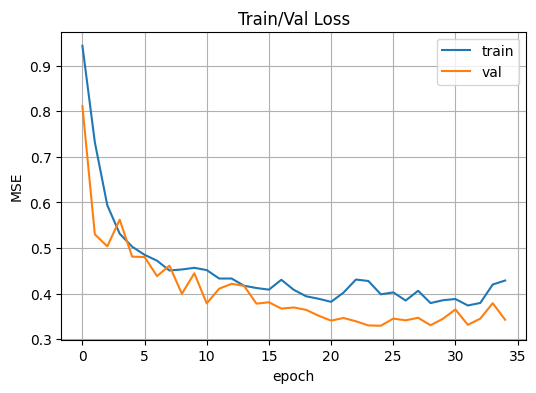

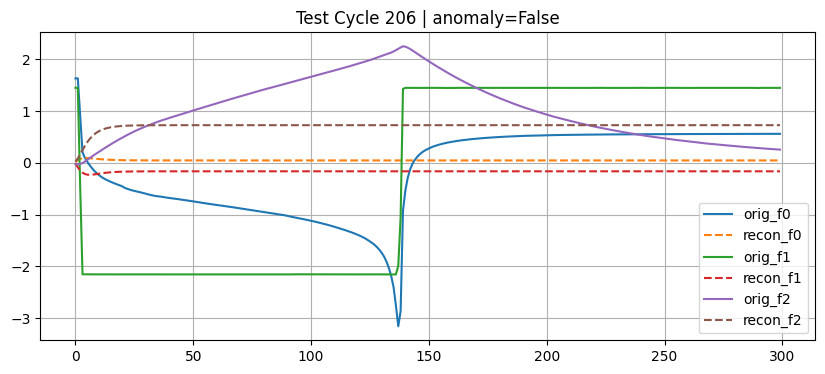

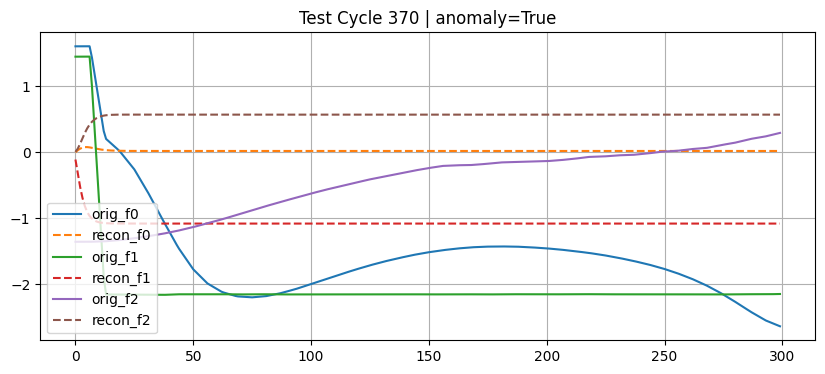

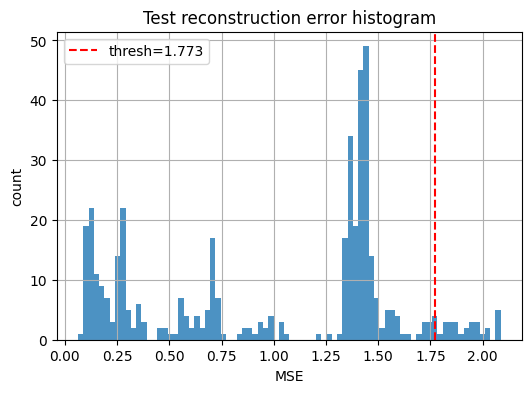

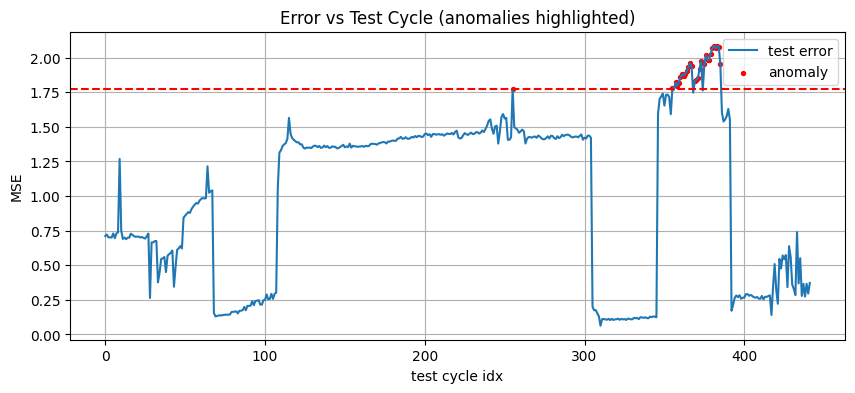

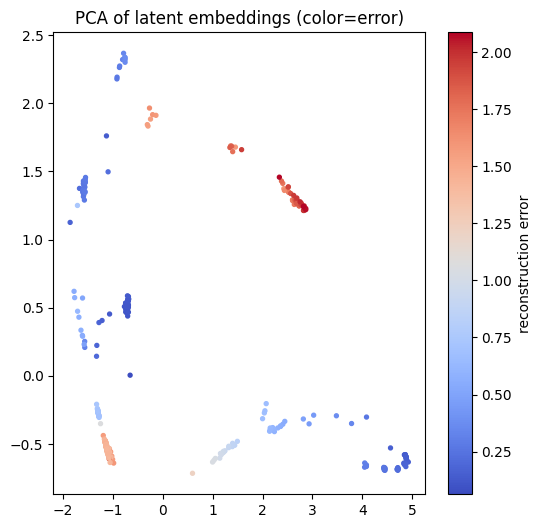

All done. Artifacts in ./artifacts/ — best model: artifacts/best_model.pth


In [ ]:
# unified_lstm_ae_pipeline.py
# End-to-end: per-cycle resample -> pick normal cycles -> scale -> LSTM-AE train -> plots + save artifacts

import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# -----------------------------
# 1) Per-cycle helpers (resample -> fixed length)
# -----------------------------
FEATURES = ["Voltage_measured","Current_measured","Temperature_measured"]
TIME_COL = "Time"
SEQ_LEN = 300

def clean_and_sort(df):
    cols = FEATURES + [TIME_COL, "battery_id", "cycle_count"]
    return (df[cols]
            .dropna()
            .sort_values(["battery_id","cycle_count",TIME_COL])
            .reset_index(drop=True))

def resample_cycle_to_len(cycle_df, seq_len=SEQ_LEN):
    n = len(cycle_df)
    if n < 2:
        cycle_df = pd.concat([cycle_df, cycle_df], ignore_index=True)
        n = 2
    x_old = np.linspace(0.0, 1.0, n)
    x_new = np.linspace(0.0, 1.0, seq_len)
    cols = []
    for col in FEATURES:
        y = cycle_df[col].values.astype(np.float64)
        cols.append(np.interp(x_new, x_old, y))
    return np.stack(cols, axis=1)  # (seq_len, n_features)

def build_sequences(df):
    X, meta_rows = [], []
    # group in original row order grouping preserves continuity
    for (bid, cyc), g in df.groupby(["battery_id","cycle_count"], sort=False):
        X.append(resample_cycle_to_len(g))
        meta_rows.append((bid, int(cyc)))
    X = np.stack(X) if len(X) else np.zeros((0, SEQ_LEN, len(FEATURES)))
    meta = pd.DataFrame(meta_rows, columns=["battery_id","cycle_count"])
    return X, meta

# -----------------------------
# 2) Normal-cycle selector
# -----------------------------
def pick_normal_cycles(meta):
    max_by_batt = meta.groupby("battery_id")["cycle_count"].max().to_dict()
    mask = []
    for _, r in meta.iterrows():
        mx = int(max_by_batt[r["battery_id"]])
        limit = min(40, max(1, int(0.4 * mx)))
        mask.append(int(r["cycle_count"]) <= limit)
    return np.array(mask, dtype=bool)

# -----------------------------
# 3) LSTM Autoencoder (matches your separated block)
# -----------------------------
class LSTMAutoencoder(nn.Module):
    def __init__(self, seq_len=SEQ_LEN, n_features=3, embedding_dim=128, num_layers=2):
        super().__init__()
        self.seq_len = seq_len
        self.n_features = n_features
        self.embedding_dim = embedding_dim

        # Encoder
        self.encoder_lstm = nn.LSTM(
            input_size=n_features, hidden_size=embedding_dim,
            num_layers=num_layers, batch_first=True
        )

        # Decoder
        self.decoder_lstm = nn.LSTM(
            input_size=embedding_dim, hidden_size=embedding_dim,
            num_layers=num_layers, batch_first=True
        )
        self.output_layer = nn.Linear(embedding_dim, n_features)

    def forward(self, x):
        # x: (B, T, F)
        _, (hidden, cell) = self.encoder_lstm(x)                 # hidden: (num_layers, B, H)
        hidden_last = hidden[-1]                                 # (B, H)
        # repeat latent
        hidden_rep = hidden_last.unsqueeze(1).repeat(1, self.seq_len, 1)  # (B, T, H)
        decoded, _ = self.decoder_lstm(hidden_rep)               # (B, T, H)
        out = self.output_layer(decoded)                         # (B, T, F)
        return out, hidden_last                                  # return recon and embedding

# -----------------------------
# 4) Reconstruction errors helper
# -----------------------------
def reconstruction_errors_and_recons(model, X_tensor, device, batch_size=128):
    model.eval()
    loader = DataLoader(TensorDataset(X_tensor), batch_size=batch_size, shuffle=False)
    errors = []
    recons_list = []
    embeds = []
    with torch.no_grad():
        for (xb,) in loader:
            xb = xb.to(device)
            recon, emb = model(xb)
            e = torch.mean((xb - recon)**2, dim=(1,2)).cpu().numpy()
            errors.append(e)
            recons_list.append(recon.cpu().numpy())
            embeds.append(emb.cpu().numpy())
    errors = np.concatenate(errors)
    recons = np.concatenate(recons_list)
    embeds = np.concatenate(embeds)
    return errors, recons, embeds

# -----------------------------
# 5) Main unified pipeline
# -----------------------------
def run_unified(train_csv="/content/train_dataset.csv",
                val_csv="/content/val_dataset.csv",
                test_csv="/content/test_dataset.csv",
                seq_len=SEQ_LEN,
                device_str=None):
    device = torch.device(device_str if device_str else ("cuda" if torch.cuda.is_available() else "cpu"))
    # ---- load raw CSVs and build per-cycle sequences ----
    print("Loading CSVs and building per-cycle sequences...")
    train_df = pd.read_csv(train_csv)
    val_df   = pd.read_csv(val_csv)
    test_df  = pd.read_csv(test_csv)

    train_raw = clean_and_sort(train_df)
    val_raw   = clean_and_sort(val_df)
    test_raw  = clean_and_sort(test_df)

    X_tr_all, meta_tr = build_sequences(train_raw)   # shape (n_cycles, seq_len, 3)
    X_va, meta_va = build_sequences(val_raw)
    X_te, meta_te = build_sequences(test_raw)

    print("Shapes (cycles):", X_tr_all.shape, X_va.shape, X_te.shape)

    # ---- pick normal cycles from train ----
    normal_mask = pick_normal_cycles(meta_tr)
    X_tr = X_tr_all[normal_mask]
    print(f"Normal train cycles: {X_tr.shape[0]} / {X_tr_all.shape[0]}")

    # ---- scale features: fit on X_tr (normal cycles) flattened ----
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_tr_flat = X_tr.reshape(-1, X_tr.shape[-1])
    scaler.fit(X_tr_flat)
    # transform all sets
    X_tr = scaler.transform(X_tr.reshape(-1, X_tr.shape[-1])).reshape(X_tr.shape)
    X_va = scaler.transform(X_va.reshape(-1, X_va.shape[-1])).reshape(X_va.shape)
    X_te = scaler.transform(X_te.reshape(-1, X_te.shape[-1])).reshape(X_te.shape)

    # save scaler
    os.makedirs("artifacts", exist_ok=True)
    joblib.dump(scaler, "artifacts/scaler.pkl")
    print("Saved scaler to artifacts/scaler.pkl")

    # ---- convert to tensors (keep val/test on CPU until eval to avoid GPU memory blow) ----
    X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)       # train only normals
    X_va_tensor = torch.tensor(X_va, dtype=torch.float32)
    X_te_tensor = torch.tensor(X_te, dtype=torch.float32)

    # ---- dataloaders ----
    batch_size = 64
    train_loader = DataLoader(TensorDataset(X_tr_tensor, X_tr_tensor), batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
    # we'll use full-tensor validation in eval to compute per-cycle errors faster (no loader)
    print("DataLoaders ready. Train batches:", len(train_loader))

    # ---- model init ----
    model = LSTMAutoencoder(seq_len=seq_len, n_features=len(FEATURES), embedding_dim=256, num_layers=2).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=4e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

    # ---- training loop with early stopping ----
    best_val = np.inf
    best_epoch = -1
    train_losses, val_losses = [], []
    patience, patience_counter = 10, 0
    max_epochs = 100

    print("Starting training on normal cycles...")
    for epoch in range(1, max_epochs+1):
        model.train()
        running = 0.0
        batches = 0
        for xb, _ in train_loader:
            xb = xb.to(device)
            optimizer.zero_grad()
            recon, _ = model(xb)
            loss = criterion(recon, xb)
            loss.backward()
            optimizer.step()
            running += loss.item()
            batches += 1
        train_loss = running / max(1, batches)
        train_losses.append(train_loss)

        # val: compute reconstruction on X_va (full tensor) in eval mode
        model.eval()
        with torch.no_grad():
            X_va_gpu = X_va_tensor.to(device)
            recon_va, _ = model(X_va_gpu)
            val_loss = criterion(recon_va, X_va_gpu).item()
            val_losses.append(val_loss)
            # free mem
            del X_va_gpu, recon_va
            torch.cuda.empty_cache()

        scheduler.step(val_loss)
        print(f"Epoch {epoch}: Train {train_loss:.4f} | Val {val_loss:.4f}")

        # checkpoint
        if val_loss < best_val:
            best_val = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), "artifacts/best_model.pth")
            print(f"  -> saved best_model.pth (epoch {epoch})")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    print("Training finished. Best val:", best_val, "at epoch", best_epoch)

    # ---- load best model and evaluate on test ----
    model.load_state_dict(torch.load("artifacts/best_model.pth", map_location=device))
    model.to(device)
    # reconstructions and errors (val/test)
    val_errors, val_recons, val_embs = reconstruction_errors_and_recons(model, X_va_tensor, device, batch_size=256)
    test_errors, test_recons, test_embs = reconstruction_errors_and_recons(model, X_te_tensor, device, batch_size=256)

    # pick threshold (use val 99th percentile or mean+2*std)
    thresh = np.percentile(val_errors, 99.0)
    print("Threshold (val 99th pct):", thresh)

    # per-cycle anomaly mask (on test cycles)
    test_anom_mask = test_errors > thresh
    print(f"Detected anomalies (test cycles): {test_anom_mask.sum()} / {len(test_errors)}")

    # ---- Save artifacts ----
    np.save("artifacts/val_errors.npy", val_errors)
    np.save("artifacts/test_errors.npy", test_errors)
    np.save("artifacts/test_recons.npy", test_recons)
    np.save("artifacts/test_inputs.npy", X_te)
    joblib.dump({"train_losses": train_losses, "val_losses": val_losses}, "artifacts/train_log.pkl")
    print("Saved artifacts in artifacts/")

    # -----------------------------
    # PLOTS
    # -----------------------------
    # 1) loss curves
    plt.figure(figsize=(6,4))
    plt.plot(train_losses, label="train")
    plt.plot(val_losses, label="val")
    plt.xlabel("epoch"); plt.ylabel("MSE"); plt.title("Train/Val Loss"); plt.legend(); plt.grid(True)
    plt.savefig("artifacts/loss_curve.png", dpi=150)
    plt.show()

    # 2) example reconstruction: pick a few test cycles (normal + anomalous)
    os.makedirs("artifacts/plots", exist_ok=True)
    # choose some normal and anomalous indices
    normal_idx = np.where(~test_anom_mask)[0]
    anom_idx = np.where(test_anom_mask)[0]
    choose = []
    if len(normal_idx) > 0:
        choose.append(normal_idx[len(normal_idx)//2])  # a middle normal
    if len(anom_idx) > 0:
        choose.append(anom_idx[len(anom_idx)//2])     # a middle anomaly
    if len(choose) == 0:
        choose = [0]

    for i, idx in enumerate(choose):
        orig = X_te[idx]           # scaled original (numpy)
        recon = test_recons[idx]
        # plot all 3 features stacked
        plt.figure(figsize=(10,4))
        t = np.arange(seq_len)
        for f in range(orig.shape[1]):
            plt.plot(t, orig[:,f], label=f"orig_f{f}")
            plt.plot(t, recon[:,f], "--", label=f"recon_f{f}")
        plt.title(f"Test Cycle {idx} | anomaly={bool(test_anom_mask[idx])}")
        plt.legend(); plt.grid(True)
        plt.savefig(f"artifacts/plots/recon_cycle_{idx}.png", dpi=150)
        plt.show()

    # 3) error histogram
    plt.figure(figsize=(6,4))
    plt.hist(test_errors, bins=80, alpha=0.8)
    plt.axvline(thresh, color='r', linestyle='--', label=f"thresh={thresh:.3f}")
    plt.title("Test reconstruction error histogram")
    plt.xlabel("MSE"); plt.ylabel("count"); plt.legend(); plt.grid(True)
    plt.savefig("artifacts/plots/error_hist.png", dpi=150)
    plt.show()

    # 4) error vs cycle index (highlight anomalies)
    plt.figure(figsize=(10,4))
    plt.plot(test_errors, label="test error")
    plt.scatter(np.where(test_anom_mask)[0], test_errors[test_anom_mask], color='r', s=8, label="anomaly")
    plt.axhline(thresh, color='r', linestyle='--')
    plt.xlabel("test cycle idx"); plt.ylabel("MSE"); plt.title("Error vs Test Cycle (anomalies highlighted)")
    plt.legend(); plt.grid(True)
    plt.savefig("artifacts/plots/error_vs_cycle.png", dpi=150)
    plt.show()

    # 5) latent PCA
    try:
        pca = PCA(n_components=2).fit_transform(test_embs)
        plt.figure(figsize=(6,6))
        plt.scatter(pca[:,0], pca[:,1], c=test_errors, cmap="coolwarm", s=8)
        plt.colorbar(label="reconstruction error")
        plt.title("PCA of latent embeddings (color=error)")
        plt.savefig("artifacts/plots/latent_pca.png", dpi=150)
        plt.show()
    except Exception as e:
        print("PCA plot failed:", e)


    print("All done. Artifacts in ./artifacts/ — best model: artifacts/best_model.pth")

# -----------------------------
# run
# -----------------------------
if __name__ == "__main__":
    run_unified()


# TEST-RUN2

Loading CSVs and building per-cycle sequences...
Shapes (cycles): (1857, 300, 3) (495, 300, 3) (442, 300, 3)
Normal train cycles: 585 / 1857
Saved scaler to artifacts/scaler.pkl
DataLoaders ready. Train batches: 10
Starting training on normal cycles...
Epoch 1: Train 1.1220 | Val 0.8352
  -> saved best_model.pth (epoch 1)
Epoch 2: Train 0.7984 | Val 0.5405
  -> saved best_model.pth (epoch 2)
Epoch 3: Train 0.6276 | Val 0.5100
  -> saved best_model.pth (epoch 3)
Epoch 4: Train 0.5647 | Val 0.4778
  -> saved best_model.pth (epoch 4)
Epoch 5: Train 0.5100 | Val 0.4418
  -> saved best_model.pth (epoch 5)
Epoch 6: Train 0.4820 | Val 0.4238
  -> saved best_model.pth (epoch 6)
Epoch 7: Train 0.4660 | Val 0.4315
Epoch 8: Train 0.4214 | Val 0.4179
  -> saved best_model.pth (epoch 8)
Epoch 9: Train 0.4632 | Val 0.4036
  -> saved best_model.pth (epoch 9)
Epoch 10: Train 0.4523 | Val 0.3683
  -> saved best_model.pth (epoch 10)
Epoch 11: Train 0.4218 | Val 0.3983
Epoch 12: Train 0.4245 | Val 0.3972

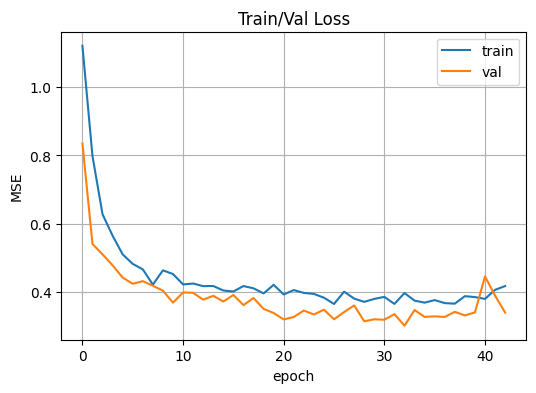

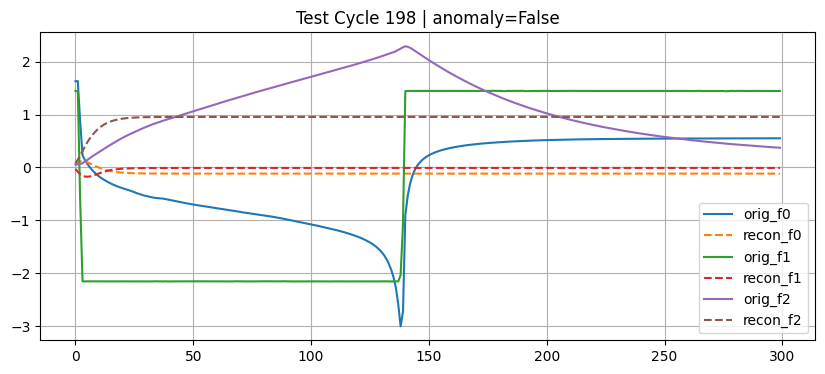

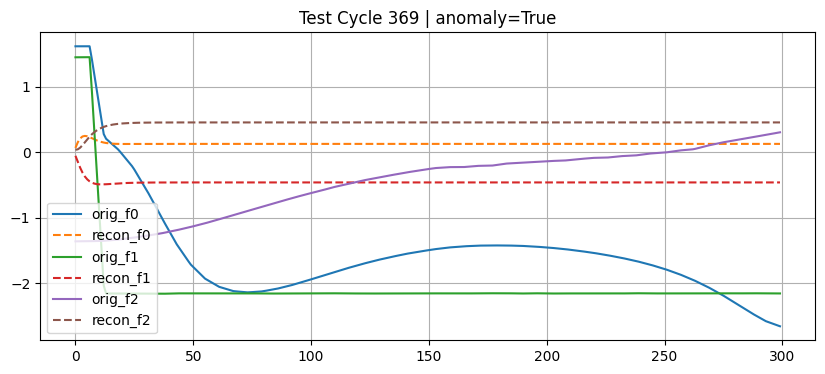

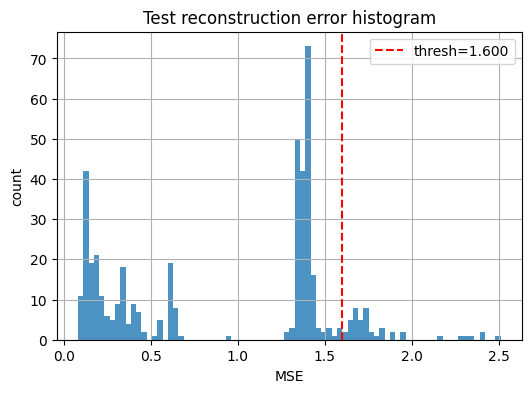

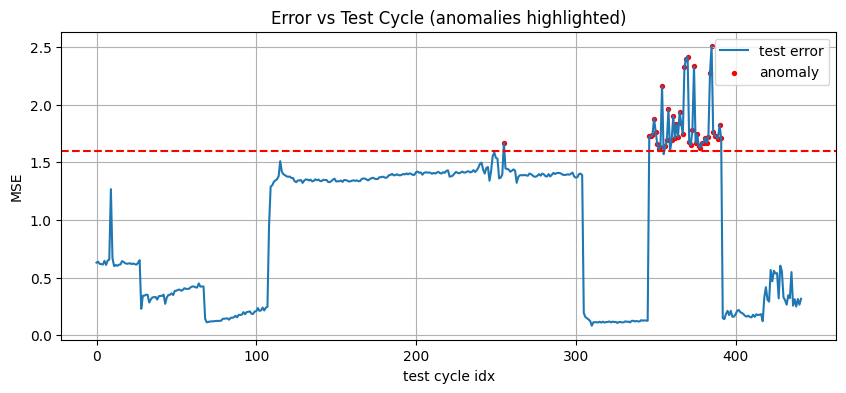

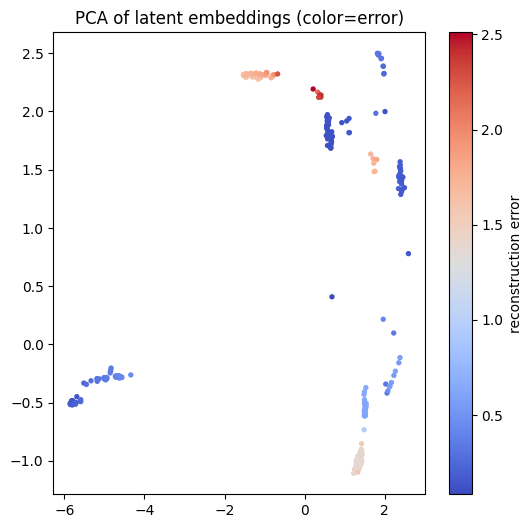

All done. Artifacts in ./artifacts/ — best model: artifacts/best_model.pth


In [16]:
# unified_lstm_ae_pipeline.py
# End-to-end: per-cycle resample -> pick normal cycles -> scale -> LSTM-AE train -> plots + save artifacts

import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# -----------------------------
# 1) Per-cycle helpers (resample -> fixed length)
# -----------------------------
FEATURES = ["Voltage_measured","Current_measured","Temperature_measured"]
TIME_COL = "Time"
SEQ_LEN = 300

def clean_and_sort(df):
    cols = FEATURES + [TIME_COL, "battery_id", "cycle_count"]
    return (df[cols]
            .dropna()
            .sort_values(["battery_id","cycle_count",TIME_COL])
            .reset_index(drop=True))

def resample_cycle_to_len(cycle_df, seq_len=SEQ_LEN):
    n = len(cycle_df)
    if n < 2:
        cycle_df = pd.concat([cycle_df, cycle_df], ignore_index=True)
        n = 2
    x_old = np.linspace(0.0, 1.0, n)
    x_new = np.linspace(0.0, 1.0, seq_len)
    cols = []
    for col in FEATURES:
        y = cycle_df[col].values.astype(np.float64)
        cols.append(np.interp(x_new, x_old, y))
    return np.stack(cols, axis=1)  # (seq_len, n_features)

def build_sequences(df):
    X, meta_rows = [], []
    # group in original row order grouping preserves continuity
    for (bid, cyc), g in df.groupby(["battery_id","cycle_count"], sort=False):
        X.append(resample_cycle_to_len(g))
        meta_rows.append((bid, int(cyc)))
    X = np.stack(X) if len(X) else np.zeros((0, SEQ_LEN, len(FEATURES)))
    meta = pd.DataFrame(meta_rows, columns=["battery_id","cycle_count"])
    return X, meta

# -----------------------------
# 2) Normal-cycle selector
# -----------------------------
def pick_normal_cycles(meta):
    max_by_batt = meta.groupby("battery_id")["cycle_count"].max().to_dict()
    mask = []
    for _, r in meta.iterrows():
        mx = int(max_by_batt[r["battery_id"]])
        limit = min(40, max(1, int(0.4 * mx)))
        mask.append(int(r["cycle_count"]) <= limit)
    return np.array(mask, dtype=bool)

# -----------------------------
# 3) LSTM Autoencoder (matches your separated block)
# -----------------------------
class LSTMAutoencoder(nn.Module):
    def __init__(self, seq_len=SEQ_LEN, n_features=3, embedding_dim=128, num_layers=2):
        super().__init__()
        self.seq_len = seq_len
        self.n_features = n_features
        self.embedding_dim = embedding_dim

        # Encoder
        self.encoder_lstm = nn.LSTM(
            input_size=n_features, hidden_size=embedding_dim,
            num_layers=num_layers, batch_first=True
        )

        # Decoder
        self.decoder_lstm = nn.LSTM(
            input_size=embedding_dim, hidden_size=embedding_dim,
            num_layers=num_layers, batch_first=True
        )
        self.output_layer = nn.Linear(embedding_dim, n_features)

    def forward(self, x):
        # x: (B, T, F)
        _, (hidden, cell) = self.encoder_lstm(x)                 # hidden: (num_layers, B, H)
        hidden_last = hidden[-1]                                 # (B, H)
        # repeat latent
        hidden_rep = hidden_last.unsqueeze(1).repeat(1, self.seq_len, 1)  # (B, T, H)
        decoded, _ = self.decoder_lstm(hidden_rep)               # (B, T, H)
        out = self.output_layer(decoded)                         # (B, T, F)
        return out, hidden_last                                  # return recon and embedding

# -----------------------------
# 4) Reconstruction errors helper
# -----------------------------
def reconstruction_errors_and_recons(model, X_tensor, device, batch_size=128):
    model.eval()
    loader = DataLoader(TensorDataset(X_tensor), batch_size=batch_size, shuffle=False)
    errors = []
    recons_list = []
    embeds = []
    with torch.no_grad():
        for (xb,) in loader:
            xb = xb.to(device)
            recon, emb = model(xb)
            e = torch.mean((xb - recon)**2, dim=(1,2)).cpu().numpy()
            errors.append(e)
            recons_list.append(recon.cpu().numpy())
            embeds.append(emb.cpu().numpy())
    errors = np.concatenate(errors)
    recons = np.concatenate(recons_list)
    embeds = np.concatenate(embeds)
    return errors, recons, embeds

# -----------------------------
# 5) Main unified pipeline
# -----------------------------
def run_unified(train_csv="/content/train_dataset.csv",
                val_csv="/content/val_dataset.csv",
                test_csv="/content/test_dataset.csv",
                seq_len=SEQ_LEN,
                device_str=None):
    device = torch.device(device_str if device_str else ("cuda" if torch.cuda.is_available() else "cpu"))
    # ---- load raw CSVs and build per-cycle sequences ----
    print("Loading CSVs and building per-cycle sequences...")
    train_df = pd.read_csv(train_csv)
    val_df   = pd.read_csv(val_csv)
    test_df  = pd.read_csv(test_csv)

    train_raw = clean_and_sort(train_df)
    val_raw   = clean_and_sort(val_df)
    test_raw  = clean_and_sort(test_df)

    X_tr_all, meta_tr = build_sequences(train_raw)   # shape (n_cycles, seq_len, 3)
    X_va, meta_va = build_sequences(val_raw)
    X_te, meta_te = build_sequences(test_raw)

    print("Shapes (cycles):", X_tr_all.shape, X_va.shape, X_te.shape)

    # ---- pick normal cycles from train ----
    normal_mask = pick_normal_cycles(meta_tr)
    X_tr = X_tr_all[normal_mask]
    print(f"Normal train cycles: {X_tr.shape[0]} / {X_tr_all.shape[0]}")

    # ---- scale features: fit on X_tr (normal cycles) flattened ----
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_tr_flat = X_tr.reshape(-1, X_tr.shape[-1])
    scaler.fit(X_tr_flat)
    # transform all sets
    X_tr = scaler.transform(X_tr.reshape(-1, X_tr.shape[-1])).reshape(X_tr.shape)
    X_va = scaler.transform(X_va.reshape(-1, X_va.shape[-1])).reshape(X_va.shape)
    X_te = scaler.transform(X_te.reshape(-1, X_te.shape[-1])).reshape(X_te.shape)

    # save scaler
    os.makedirs("artifacts", exist_ok=True)
    joblib.dump(scaler, "artifacts/scaler.pkl")
    print("Saved scaler to artifacts/scaler.pkl")

    # ---- convert to tensors (keep val/test on CPU until eval to avoid GPU memory blow) ----
    X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)       # train only normals
    X_va_tensor = torch.tensor(X_va, dtype=torch.float32)
    X_te_tensor = torch.tensor(X_te, dtype=torch.float32)

    # ---- dataloaders ----
    batch_size = 64
    train_loader = DataLoader(TensorDataset(X_tr_tensor, X_tr_tensor), batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
    # we'll use full-tensor validation in eval to compute per-cycle errors faster (no loader)
    print("DataLoaders ready. Train batches:", len(train_loader))

    # ---- model init ----
    model = LSTMAutoencoder(seq_len=seq_len, n_features=len(FEATURES), embedding_dim=256, num_layers=2).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=4e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

    # ---- training loop with early stopping ----
    best_val = np.inf
    best_epoch = -1
    train_losses, val_losses = [], []
    patience, patience_counter = 10, 0
    max_epochs = 100

    print("Starting training on normal cycles...")
    for epoch in range(1, max_epochs+1):
        model.train()
        running = 0.0
        batches = 0
        for xb, _ in train_loader:
            xb = xb.to(device)
            optimizer.zero_grad()
            recon, _ = model(xb)
            loss = criterion(recon, xb)
            loss.backward()
            optimizer.step()
            running += loss.item()
            batches += 1
        train_loss = running / max(1, batches)
        train_losses.append(train_loss)

        # val: compute reconstruction on X_va (full tensor) in eval mode
        model.eval()
        with torch.no_grad():
            X_va_gpu = X_va_tensor.to(device)
            recon_va, _ = model(X_va_gpu)
            val_loss = criterion(recon_va, X_va_gpu).item()
            val_losses.append(val_loss)
            # free mem
            del X_va_gpu, recon_va
            torch.cuda.empty_cache()

        scheduler.step(val_loss)
        print(f"Epoch {epoch}: Train {train_loss:.4f} | Val {val_loss:.4f}")

        # checkpoint
        if val_loss < best_val:
            best_val = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), "artifacts/best_model.pth")
            print(f"  -> saved best_model.pth (epoch {epoch})")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    print("Training finished. Best val:", best_val, "at epoch", best_epoch)

    # ---- load best model and evaluate on test ----
    model.load_state_dict(torch.load("artifacts/best_model.pth", map_location=device))
    model.to(device)
    # reconstructions and errors (val/test)
    val_errors, val_recons, val_embs = reconstruction_errors_and_recons(model, X_va_tensor, device, batch_size=256)
    test_errors, test_recons, test_embs = reconstruction_errors_and_recons(model, X_te_tensor, device, batch_size=256)

    # pick threshold (use val 99th percentile or mean+2*std)
    thresh = np.percentile(val_errors, 99.0)
    print("Threshold (val 99th pct):", thresh)

    # per-cycle anomaly mask (on test cycles)
    test_anom_mask = test_errors > thresh
    print(f"Detected anomalies (test cycles): {test_anom_mask.sum()} / {len(test_errors)}")

    # ---- Save artifacts ----
    np.save("artifacts/val_errors.npy", val_errors)
    np.save("artifacts/test_errors.npy", test_errors)
    np.save("artifacts/test_recons.npy", test_recons)
    np.save("artifacts/test_inputs.npy", X_te)
    joblib.dump({"train_losses": train_losses, "val_losses": val_losses}, "artifacts/train_log.pkl")
    print("Saved artifacts in artifacts/")

    # -----------------------------
    # PLOTS
    # -----------------------------
    # 1) loss curves
    plt.figure(figsize=(6,4))
    plt.plot(train_losses, label="train")
    plt.plot(val_losses, label="val")
    plt.xlabel("epoch"); plt.ylabel("MSE"); plt.title("Train/Val Loss"); plt.legend(); plt.grid(True)
    plt.savefig("artifacts/loss_curve.png", dpi=150)
    plt.show()

    # 2) example reconstruction: pick a few test cycles (normal + anomalous)
    os.makedirs("artifacts/plots", exist_ok=True)
    # choose some normal and anomalous indices
    normal_idx = np.where(~test_anom_mask)[0]
    anom_idx = np.where(test_anom_mask)[0]
    choose = []
    if len(normal_idx) > 0:
        choose.append(normal_idx[len(normal_idx)//2])  # a middle normal
    if len(anom_idx) > 0:
        choose.append(anom_idx[len(anom_idx)//2])     # a middle anomaly
    if len(choose) == 0:
        choose = [0]

    for i, idx in enumerate(choose):
        orig = X_te[idx]           # scaled original (numpy)
        recon = test_recons[idx]
        # plot all 3 features stacked
        plt.figure(figsize=(10,4))
        t = np.arange(seq_len)
        for f in range(orig.shape[1]):
            plt.plot(t, orig[:,f], label=f"orig_f{f}")
            plt.plot(t, recon[:,f], "--", label=f"recon_f{f}")
        plt.title(f"Test Cycle {idx} | anomaly={bool(test_anom_mask[idx])}")
        plt.legend(); plt.grid(True)
        plt.savefig(f"artifacts/plots/recon_cycle_{idx}.png", dpi=150)
        plt.show()

    # 3) error histogram
    plt.figure(figsize=(6,4))
    plt.hist(test_errors, bins=80, alpha=0.8)
    plt.axvline(thresh, color='r', linestyle='--', label=f"thresh={thresh:.3f}")
    plt.title("Test reconstruction error histogram")
    plt.xlabel("MSE"); plt.ylabel("count"); plt.legend(); plt.grid(True)
    plt.savefig("artifacts/plots/error_hist.png", dpi=150)
    plt.show()

    # 4) error vs cycle index (highlight anomalies)
    plt.figure(figsize=(10,4))
    plt.plot(test_errors, label="test error")
    plt.scatter(np.where(test_anom_mask)[0], test_errors[test_anom_mask], color='r', s=8, label="anomaly")
    plt.axhline(thresh, color='r', linestyle='--')
    plt.xlabel("test cycle idx"); plt.ylabel("MSE"); plt.title("Error vs Test Cycle (anomalies highlighted)")
    plt.legend(); plt.grid(True)
    plt.savefig("artifacts/plots/error_vs_cycle.png", dpi=150)
    plt.show()

    # 5) latent PCA
    try:
        pca = PCA(n_components=2).fit_transform(test_embs)
        plt.figure(figsize=(6,6))
        plt.scatter(pca[:,0], pca[:,1], c=test_errors, cmap="coolwarm", s=8)
        plt.colorbar(label="reconstruction error")
        plt.title("PCA of latent embeddings (color=error)")
        plt.savefig("artifacts/plots/latent_pca.png", dpi=150)
        plt.show()
    except Exception as e:
        print("PCA plot failed:", e)


    print("All done. Artifacts in ./artifacts/ — best model: artifacts/best_model.pth")

# -----------------------------
# run
# -----------------------------
if __name__ == "__main__":
    run_unified()
